# Linear Regression

Using the Car Price dataset, the goal is to make a Linear Regression model to predict price, using the most appropriately variables.

The data file was obtained on <a href="https://www.kaggle.com/hellbuoy/car-price-prediction" target="_blank">Kaggle</a>, and is from <a href="https://archive.ics.uci.edu/ml/datasets/Automobile" target="_blank">UCI - Machine Learning Repository</a>.

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import seaborn as sns

## Data checking and cleaning

Initially, we upload our data and look at its structure.

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
print(data.shape)
data.head()

(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Now we check for rows without any data and the data type of the columns.

In [3]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

We remove the ID column and all other non-numerical columns, since they won't be used.

In [5]:
data = data.drop(['car_ID'], axis = 1)
for i in data:
    if data[i].dtypes == object:
        data = data.drop([i], axis = 1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


## Choosing our variables

In order to determine the best variables for our problem, we can to analyze the correlation coefficients between our them. And to make it easier (and prettier), we'll use a heatmap.

Text(0.5, 1.0, 'Correlation between variables from the dataset')

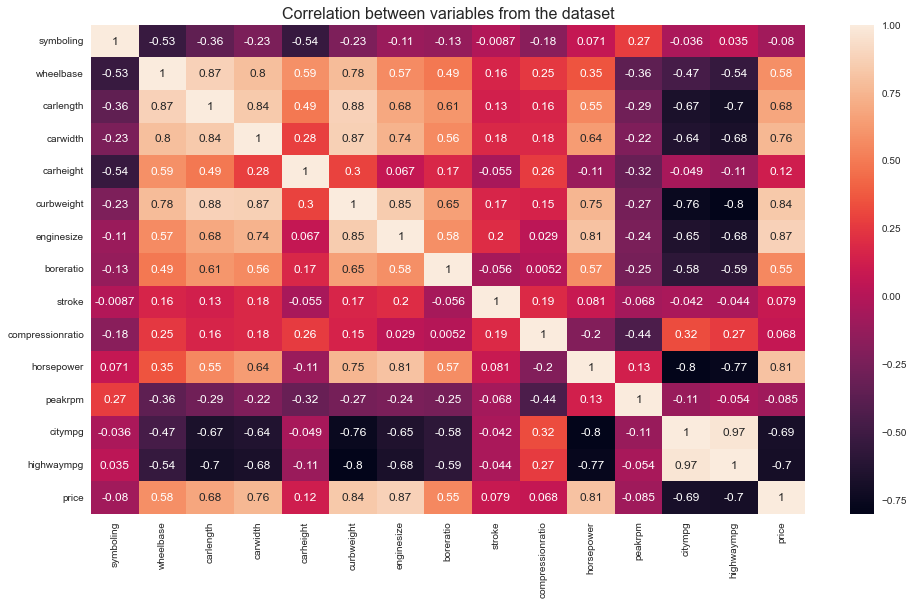

In [6]:
plt.figure(figsize = (16,9))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation between variables from the dataset', fontsize = 16)

For our problem, since we have price as our dependent variable, the information we need is on the last row (or last column) of the heatmap. Now we can see that Engine Size, Horse Power and Curb Weight are the ones most correlated to price and, therefore, will be the ones used.

## Creating the models

First, we are going to create three models, using only one independent variable, so we can visualize what's going on.

In [7]:
#enginesize
x1 = data.iloc[:,6].values
y = data.iloc[:,14].values
x1 = x1.reshape(-1,1)
reg1 = LinearRegression()
reg1.fit(x1,y)

#horsepower
x2 = data.iloc[:,10].values
x2 = x2.reshape(-1,1)
reg2 = LinearRegression()
reg2.fit(x2,y)

#curbweight
x3 = data.iloc[:,5].values
x3 = x3.reshape(-1,1)
reg3 = LinearRegression()
reg3.fit(x3,y)

LinearRegression()

With the models created, now we can plot them.

Text(0, 0.5, 'Price')

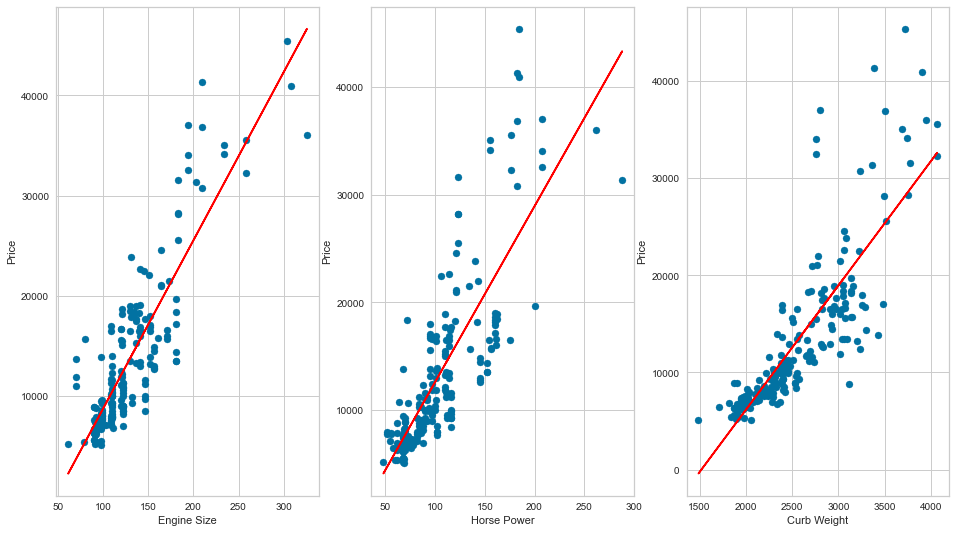

In [8]:
plt.figure(1, figsize = [16,9])

#engine size
plt.subplot(1,3,1)
plt.scatter(x1,y)
plt.plot(x1, reg1.predict(x1), color='red')
plt.xlabel('Engine Size')
plt.ylabel('Price')

#horsepower
plt.subplot(1,3,2)
plt.scatter(x2,y)
plt.plot(x2, reg2.predict(x2), color='red')
plt.xlabel('Horse Power')
plt.ylabel('Price')

#curbweight
plt.subplot(1,3,3)
plt.scatter(x3,y)
plt.plot(x3, reg3.predict(x3), color = 'red')
plt.xlabel('Curb Weight')
plt.ylabel('Price')

The models seem to be decent, but we need a way to confirm that they are good, and to see how good they are. For this, we'll use ResidualsPlot, which allows us to analyze the residuals and gives us the score (R²) of our model.

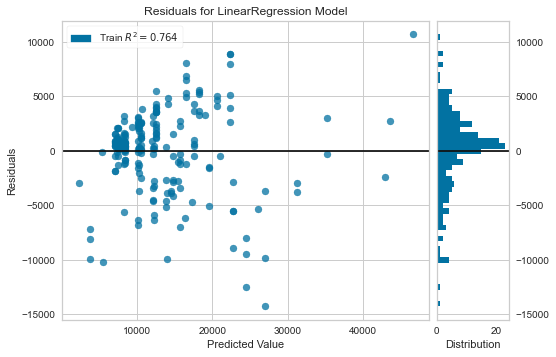

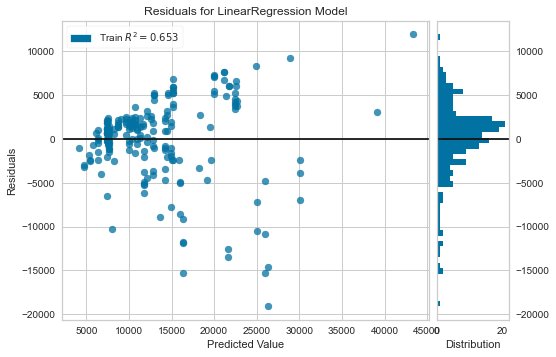

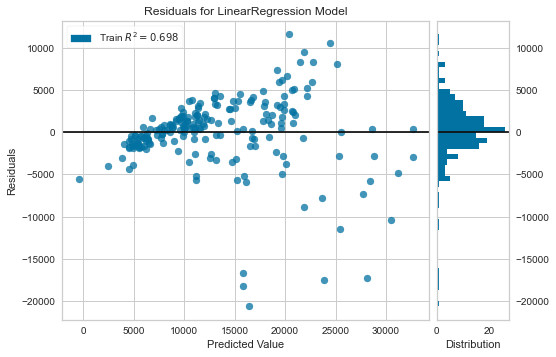

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [9]:
#enginepower
res1 = ResidualsPlot(reg1)
res1.fit(x1,y)
res1.poof()

#horsepower
res2 = ResidualsPlot(reg2)
res2.fit(x2,y)
res2.show()

#curbweight
res3 = ResidualsPlot(reg3)
res3.fit(x3,y)
res3.poof()

With the plots, we can see that our residues are random and approximately normally distributed, which is good. We can also realize with our scores that Engine size made the best model and, despite having the second higher correlation coefficient, our model using Horse Power was worse than the one using Curb Weight.

## Multiple Linear Regression

Now we can try to use all variables together and see if we get a better model.

In [10]:
x = data.iloc[:, [6,10,5]].values
reg_m = LinearRegression()
reg_m.fit(x,y)

LinearRegression()

In [11]:
print(f'R² = {reg_m.score(x,y)}')
adj_r2 = 1 - ( 1-reg_m.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print (f'Adjusted_R² = {adj_r2}')

R² = 0.8138201347761836
Adjusted_R² = 0.8110413308176192


Checking our adjusted score (which compensate for the use of multiple variables), we see that this model has the best result so far.

But can it get better? Let's try adding another variable, which, from our heatmap, should be Car Width.

In [12]:
x = data.iloc[:, [6,10,5,3]].values
reg_m = LinearRegression()
reg_m.fit(x,y)

LinearRegression()

In [13]:
print(f'R² = {reg_m.score(x,y)}')
adj_r2 = 1 - ( 1-reg_m.score(x, y) ) * ( len(y) - 1 ) / ( len(y) - x.shape[1] - 1 )
print (f'Adjusted_R² = {adj_r2}')

R² = 0.819783664180662
Adjusted_R² = 0.8161793374642752


## Conclusion

As we can see, our score increased by very little, showing that our change probably isn't worth it, since it increases the complexity of the model without increasing our results. Therefore, unless we really need all precision we can get, our model we three variables is the best one.